# PROJECT:LOAN PREDICTION

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df = pd.read_csv('LoanPredict.csv')


In [3]:
#Lets see the first 5 rows of the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Lets check the shape of the data
df.shape
# There are 12 features and 1 Target(num) and have 614 rows

(614, 13)

In [5]:
# Lets check the datatypes
df.dtypes 
#There are several categorical variables and continuous variables

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
#Lets check the loan id
df['Loan_ID'].nunique()

614

In [8]:
#As these are unique ids for every one lets drop it
df.drop('Loan_ID',axis=1,inplace=True)

In [9]:
#lets confirm the drop of loan id
df.shape

(614, 12)

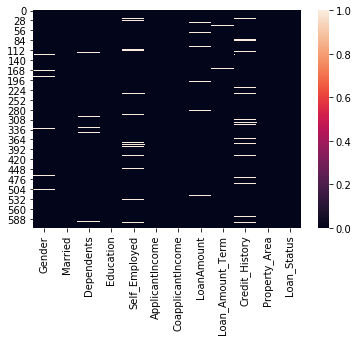

In [10]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
#There are missing values lets confirm it the other way

In [11]:
# Lets confirm about missing value once more
df.isnull().sum()
#there are missing values in gender,married,dependants,loan amount,loan amount term,credithistory

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Lets deal with missing values

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [13]:
#Lets check the missing values once more
df.isnull().sum()
#Great to see missing values have been treated properly

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Lets see the descriptive statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
#Lets see the correlation among the different features as well as with target
df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


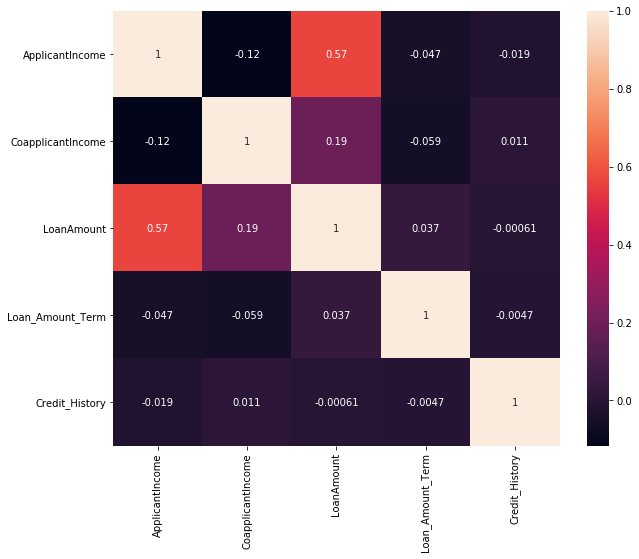

In [16]:
# lets visualize the correlation with heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


Univariate Analysis

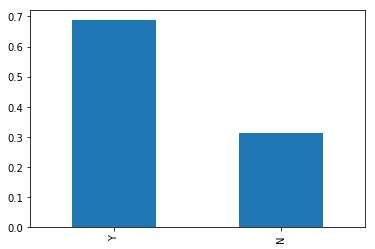

In [17]:
# Lets see Loan status
df['Loan_Status'].value_counts(normalize=True)
df['Loan_Status'].value_counts(normalize=True).plot.bar()
# we can see that outof the total 68.7% applicant's loan application was approved

Yes    0.653094
No     0.346906
Name: Married, dtype: float64


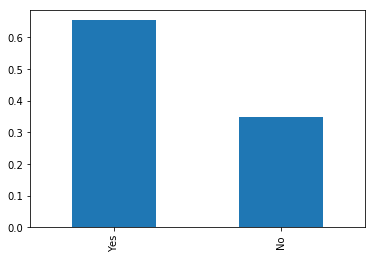

In [18]:
# Lets see Married column
print(df['Married'].value_counts(normalize=True))
df['Married'].value_counts(normalize=True).plot.bar()
# we can see that outof the total 65.34% applicant are married

0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64


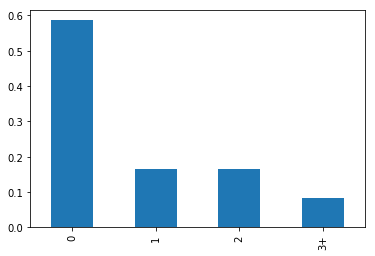

In [19]:
# Lets see dependent with bar plot
print(df['Dependents'].value_counts(normalize=True))
df['Dependents'].value_counts(normalize=True).plot.bar()
#we can see that out of all, 58% applicant does not have dependant

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


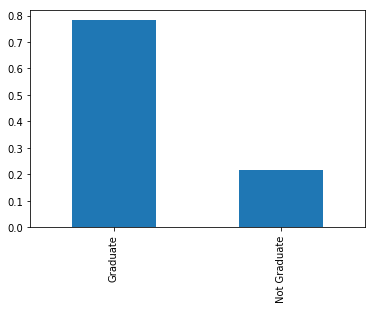

In [20]:
# Lets see education colums
print(df['Education'].value_counts(normalize=True))
df['Education'].value_counts(normalize=True).plot.bar()
#we can see that out of all, 78% applicant are graduate

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64


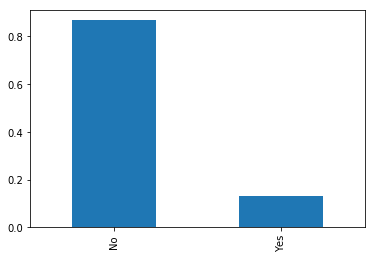

In [21]:
# Lets see Self_Employed column
print(df['Self_Employed'].value_counts(normalize=True))
df['Self_Employed'].value_counts(normalize=True).plot.bar()
#we can see that out of total applicant only 13.35 are self employed

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


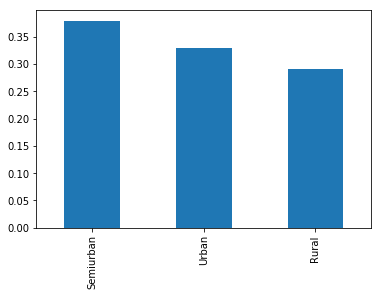

In [22]:
# Lets see Property_Area column
print(df['Property_Area'].value_counts(normalize=True))
df['Property_Area'].value_counts(normalize=True).plot.bar()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006BB76EA630>,
      dtype=object)

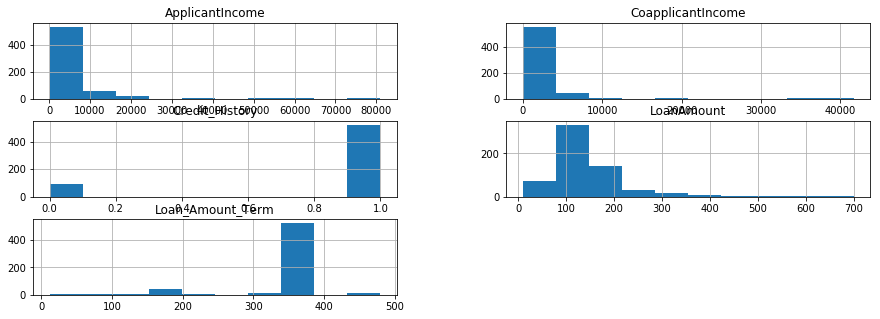

In [23]:
#Lets visualize distribution of  numeric(non categorical) data

         
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].hist(figsize=(15,5))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006BB7F23978>,
      dtype=object)

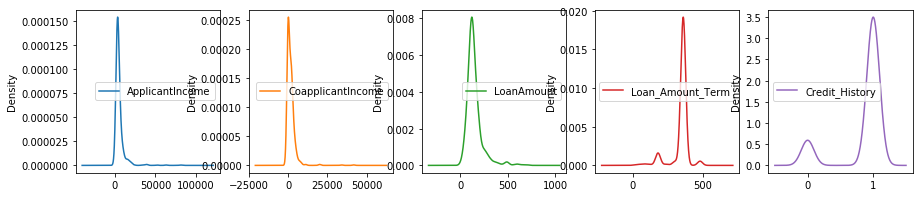

In [24]:
# # Univariate Density Plots of all numeric(non categorical) variables
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].plot(kind='density', subplots=True, layout=(1,5), sharex=False, figsize=(15,3))



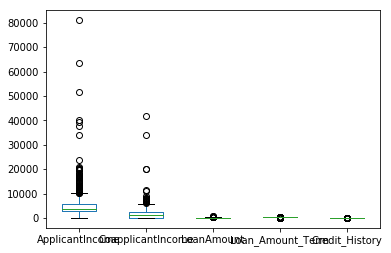

In [25]:
#Lets plot the box plot of each numeric variable
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].plot.box()

Bivariate Analyis

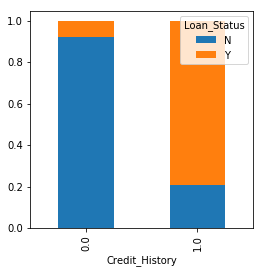

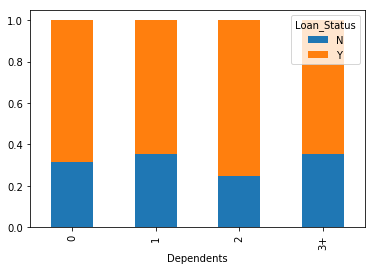

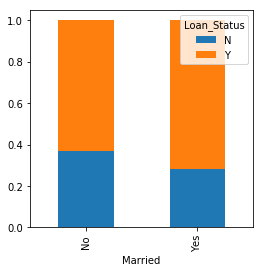

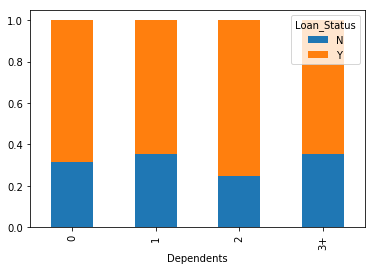

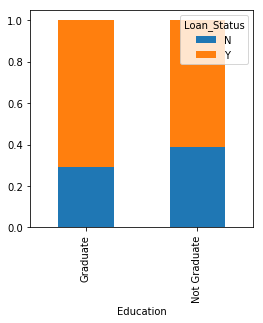

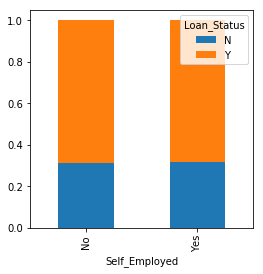

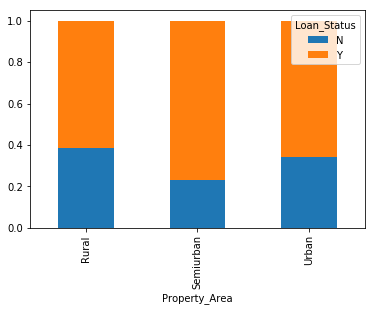

In [26]:
#Lets do the bivariate analysis of Loan status with categorical variables
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status']) 
Education=pd.crosstab(df['Education'],df['Loan_Status']) 
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status']) 
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status']) 
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status']) 

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))  
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


Findings:
1. As expcted people with credit history of 1 have more chances of loan being approved
2. People with 2 dependents have slightly more chances of loan being approved
3. Married people have slightly more chances  of loan being approved 
4. Graduate people have slightly more chances  of loan being approved 
5. Properties in semiurban area have slighly more chances of loan being approved
    


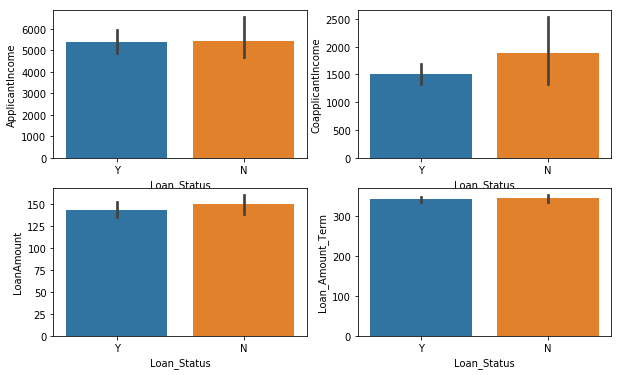

In [27]:
#Lets see the relationship of loan status with numeric variables
f,axes= plt.subplots(2,2, figsize=(10,6))
sns.barplot(x='Loan_Status', y ='ApplicantIncome', data=df,ax=axes[0,0])
sns.barplot(x='Loan_Status', y ='CoapplicantIncome', data=df, ax=axes[0,1])
sns.barplot(x='Loan_Status', y ='LoanAmount', data=df, ax=axes[1,0])
sns.barplot(x='Loan_Status', y ='Loan_Amount_Term', data=df, ax=axes[1,1])


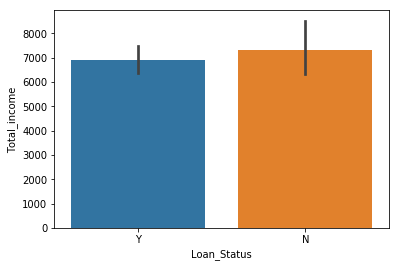

In [28]:
#Lets create a new column which is sum of applicant and coapplicant income
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
#Lets now see the relation of total income with Loan status
sns.barplot(x='Loan_Status', y ='Total_income', data=df)
# still seems strange applicants whose loan application has been approved has lower total income

In [29]:
#Lets see the distribution of total income
df['Total_income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64

In [30]:
#Lets create bins
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
df['Total_Income_bin']=pd.cut(df['Total_income'],bins,labels=group)

Text(0, 0.5, 'Percentage')

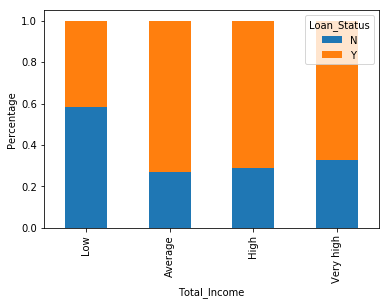

In [31]:
#Lets visulaize  now the total income bin with loan status

Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')

In [32]:
#Lets drop the colums which we have created for data exploration
df.drop(['Total_Income_bin', 'Total_income'], axis=1,inplace=True)

In [33]:
#Lets  change the 3+ in dependents variable to 3 to make it a numerical variable
df['Dependents'].replace('3+', 3,inplace=True)

In [34]:
#Lets check the skewness 
df.skew()
#There is both positive and negative skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [35]:
#Lets create a list of columns whose positive skewness has to be reduced
columsskewedp = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [36]:
# Let us reduce the  positive Skewness
for  i in columsskewedp:
    df[i]=np.log1p(df[i])


In [37]:
#Lets check the skewness again
df.skew()


ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [38]:
#Lets create a list of columns whose negative skewness has to be reduced
columsskewedn = ['Loan_Amount_Term','Credit_History']

In [39]:
#Lets reduce negative skewness
for  i in columsskewedn:
    df[i]=np.power(df[i],2)

In [40]:
#Lets check the skewness
df.skew()
#the skewness has come down 

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -1.183420
Credit_History      -2.021971
dtype: float64

In [41]:
#Let encode the categorical variables
dft = pd.get_dummies(df,drop_first=True)

In [42]:
dft.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,8.674197,0.000000,4.859812,129600.0,1.0,1,0,1,0,0,0,0,0,1,1
1,8.430327,7.319202,4.859812,129600.0,1.0,1,1,0,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,129600.0,1.0,1,1,1,0,0,0,1,0,1,1
3,7.857094,7.765993,4.795791,129600.0,1.0,1,1,1,0,0,1,0,0,1,1
4,8.699681,0.000000,4.955827,129600.0,1.0,1,0,1,0,0,0,0,0,1,1


In [43]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(dft))
dfx = dft.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dft.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (614, 15)
The shape of dataframe after removing outliers is = (573, 15)


In [44]:
# Let us seperate the features and Target
x=dfx.drop(['Loan_Status_Y'],axis=1)    
y=dfx[['Loan_Status_Y']]

In [45]:
#Lets check the shape of x
x.shape

(573, 14)

In [46]:
#Lets check the shape of y
y.shape

(573, 1)

In [47]:
#Lets check the first five rows of x
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,129600.0,1.0,1,0,1,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,129600.0,1.0,1,1,0,1,0,0,0,0,0
2,8.006701,0.000000,4.204693,129600.0,1.0,1,1,1,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,129600.0,1.0,1,1,1,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,129600.0,1.0,1,0,1,0,0,0,0,0,1


In [48]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,Loan_Status_Y
0,1
1,0
2,1
3,1
4,1


In [49]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [50]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [51]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [52]:
#As dataset is imbalanced lets use stratified k fold
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 

In [53]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=skfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.820376 (0.043273)
LDA: 0.820376 (0.043273)
KNN: 0.783805 (0.048765)
DT: 0.722824 (0.059726)
NB: 0.816868 (0.040573)
SVM: 0.820376 (0.043273)


In [54]:
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
0,LR,0.820376
1,LDA,0.820376
5,SVM,0.820376
4,NB,0.816868
2,KNN,0.783805
3,DT,0.722824


In [55]:
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostClassifier(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier(random_state=5))])))

In [56]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy

results1 = []
names1 = []

for name, model in pipelines1: 
    cv_results1 = cross_val_score(model, x, y, cv=skfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)                                              


RF: 0.764628 (0.042839)
ADC: 0.783836 (0.057233)
GBC: 0.787222 (0.052523)


In [57]:
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
2,GBC,0.787222
1,ADC,0.783836
0,RF,0.764628


In [58]:
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
0,LR,0.820376
1,LDA,0.820376
5,SVM,0.820376
4,NB,0.816868
2,GBC,0.787222
1,ADC,0.783836
2,KNN,0.783805
0,RF,0.764628
3,DT,0.722824


In [59]:
# We can see that Gaussian NB, Logistics regression, LDA, ,SVM are very close in performance

#Lets try to tune paramters of Logistic Regression  to find better cross val score

In [60]:
#Lets try to check if  cross val performance of Logitics Regression can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(x)
scaledX = scaler.transform(x)
c_values =  [0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 1,2,3,4,5]
max_iter = [10,20,50,100,200,300,500]
tol=[0.0001,0.01,0.1,0.5,1]
param_grid = dict(C=c_values,max_iter=max_iter,tol=tol)

model = LogisticRegression()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skfold,n_jobs=-1)
grid_result = grid.fit(scaledX, y)

In [61]:
#Lets check best cross val score
grid_result.best_score_
# cross val score is not increasing

0.8202443280977313

In [62]:
#Lets try to use GRIDSEARCH ON  SVM
c_values =  [0.01,0.1,0.5, 1, 2, 3, 4, 5,10,100]
gamma = [0.0001,0.0005,0.001,0.01,0.1,1,2,10]
kernel=['rbf','linear','poly']
param_grid1 = dict(C=c_values,gamma=gamma,kernel=kernel)

model1 = SVC()
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid1, scoring='accuracy', cv=skfold,n_jobs=-1)
grid_result1 = grid1.fit(scaledX, y)

In [63]:
grid_result1.best_score_

0.8202443280977313

In [64]:
# We can see that there is no improvement in crosss val accuracy  using grid search on logistic regression and SVM
#lets implement the SVM using default parameters

In [65]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [66]:
#Lets find out the best random state for selected SVC for best paramters

max_accuracy=0
sv= SVC()
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=i, stratify=y)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    sv.fit(X_train,y_train)
    ypreds=sv.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.8
At random state  2 the value of accuracy is  0.8521739130434782
At random state  3 the value of accuracy is  0.8
At random state  4 the value of accuracy is  0.808695652173913
At random state  5 the value of accuracy is  0.8
At random state  6 the value of accuracy is  0.8695652173913043
At random state  7 the value of accuracy is  0.808695652173913
At random state  8 the value of accuracy is  0.8260869565217391
At random state  9 the value of accuracy is  0.8
At random state  10 the value of accuracy is  0.8260869565217391
At random state  11 the value of accuracy is  0.8260869565217391
At random state  12 the value of accuracy is  0.8608695652173913
At random state  13 the value of accuracy is  0.8347826086956521
At random state  14 the value of accuracy is  0.8260869565217391
At random state  15 the value of accuracy is  0.8521739130434782
At random state  16 the value of accuracy is  0.8869565217391304
At random state  17 the value o

In [67]:
#Lets once again verify its  cross val  accuracy score

cross_val_score(SVC(),scaledX,y,cv=skfold,scoring="accuracy").mean()

0.8203763719643937

In [68]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 16,stratify=y)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
SVM= SVC()
SVM.fit(X_train,y_train)
ypred=SVM.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.8869565217391304


In [69]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('SVC_LOAN_prediction.csv')

In [70]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[22 13]
 [ 0 80]]


In [71]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))
#Looking at the classification report we can see that model is good in predicting Yes cases and not that good in no cases
# Seems loan status have more Y data points and Less N points
# Due to large Y points it should have predicted better as it learned well from these more data point

classification report =                precision    recall  f1-score   support

           0       1.00      0.63      0.77        35
           1       0.86      1.00      0.92        80

   micro avg       0.89      0.89      0.89       115
   macro avg       0.93      0.81      0.85       115
weighted avg       0.90      0.89      0.88       115



In [72]:
#Lets check the loan status in original data
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

AUC: 0.814


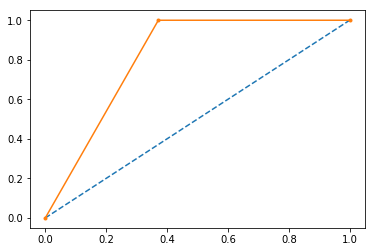

In [73]:
# calculate AUC
auc = roc_auc_score(y_test, ypred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [74]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(SVM,'SVC_HEART.pkl')

['SVC_HEART.pkl']